In [1]:
import torch 
from torchvision.transforms import ToPILImage, ToTensor

/mnt/Enterprise2/shirshak/miniconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
img = torch.zeros((512,512))
img[50:200, 50:200] = 1
img[240:380, 240:380] = 2
img[400:500, 400:500] = 3

In [28]:
img.dtype

torch.float32

In [29]:
# rgb_img[0][10:20].unique()
# rgb_img[1][10:20].unique()
# rgb_img[2][10:20].unique()

In [30]:
from PIL import Image
import matplotlib.pyplot as plt

In [31]:
for i in range(1,3):
    print(i)

1
2


In [32]:
def label_to_PIL(img, num_of_labels=4):
    "Only image of 2 dimension is expected for example 128 x 128"
    rgb_img = img.tile(3,1,1) # making it 3 dimensional by stacking up layers
    for i in range(rgb_img.shape[0]): # only applying it across 3 dimensional as our image has 3 channels R G B
        if i == 0:
            rgb_img[i] = torch.where(rgb_img[i] == 1,255,0)
        elif i == 1:
            rgb_img[i] = torch.where(rgb_img[i] == 2,255,0)
        elif i == 2:
            rgb_img[i] = torch.where(rgb_img[i] == 3,255,0)

    return rgb_img

In [33]:
rgb_img = label_to_PIL(img)

2024-05-17 19:07:50,218 - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


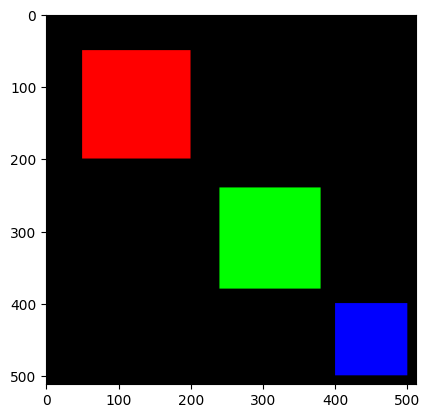

In [34]:
plt.imshow(rgb_img.permute(1,2,0))

In [35]:
(rgb_img/255).max()

tensor(1.)

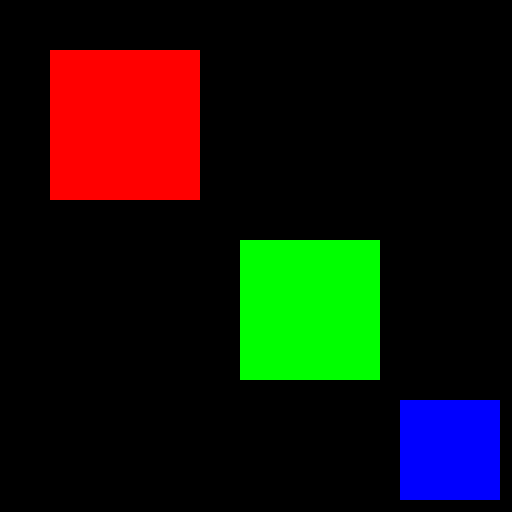

In [36]:
ToPILImage()(rgb_img/255)

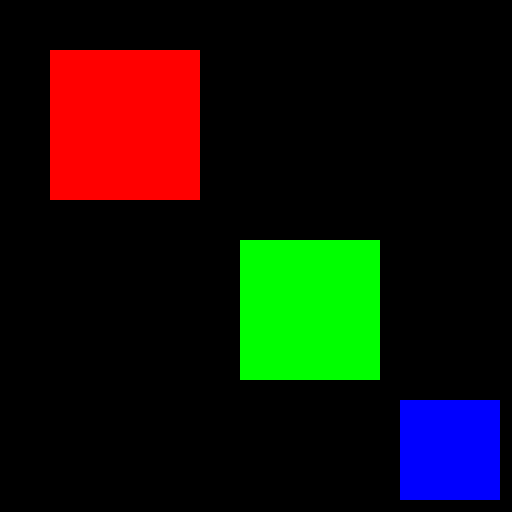

In [37]:
image = ToPILImage()(torch.as_tensor(ToTensor()((rgb_img/255).permute(1,2,0).detach().cpu().numpy()), dtype=torch.float32))
image

In [38]:
rgb_img.max()

tensor(255.)

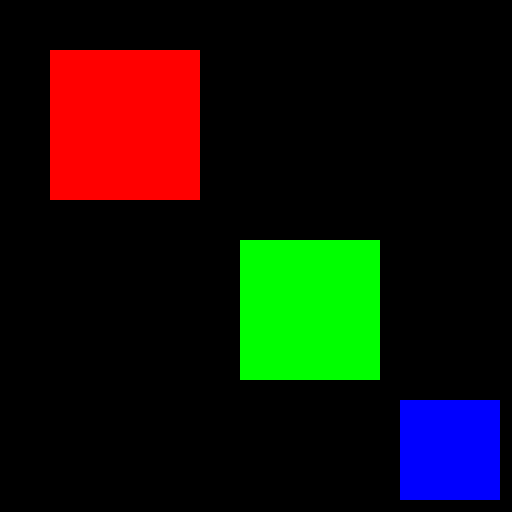

In [51]:
from monai.transforms import ScaleIntensityRange, Resize
import torch


scale_img = ScaleIntensityRange(a_min=rgb_img.min(), a_max=rgb_img.max(), b_min=0, b_max=1)

ToPILImage()(torch.as_tensor(scale_img((rgb_img)), dtype=torch.float32))

In [52]:
rgb_img.shape

torch.Size([3, 512, 512])

In [64]:
resize_img = Resize(spatial_size=(100,100))(rgb_img.unsqueeze(dim=0))

ValueError: len(spatial_size) must be greater or equal to img spatial dimensions, got spatial_size=2 img=3.

In [61]:
resize_img.shape

torch.Size([3, 100, 100])

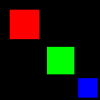

In [62]:
ToPILImage()(torch.as_tensor(resize_img/255, dtype=torch.float32))

In [22]:
resize_op = Resize(spatial_size=(100,100,100), )
img = torch.zeros(1,217,217,217)
resize_op(img).shape

torch.Size([1, 100, 100, 100])